In [3]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [13]:
df = pd.read_csv('data/final_agro_scor_dataset.csv')

In [14]:
def calculate_scor_total(df, weights):
    """
    Розрахунок інтегрального показника SCOR_total на основі ваг і напрямку оптимізації
    :param df: pandas DataFrame з колонками
    :param weights: словник {'назва_показника': {'weight': float, 'maximize': bool}}
    """
    total_weight = sum(v['weight'] for v in weights.values())
    scor_components = []

    for col, params in weights.items():
        weight = params['weight'] / total_weight
        values = df[col]
        if not params['maximize']:
            values = 1 - values
        scor_components.append(weight * values)

    df['SCOR_total'] = sum(scor_components)
    return df

In [15]:
weights = {
        'SCOR_norm': {'weight': 0.5, 'maximize': True},
        'Fert_SCOR': {'weight': 0.3, 'maximize': False},
        'Cost_SCOR': {'weight': 0.2, 'maximize': False}
    }
df = calculate_scor_total(df, weights)

C:\Users\5302\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\5302\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


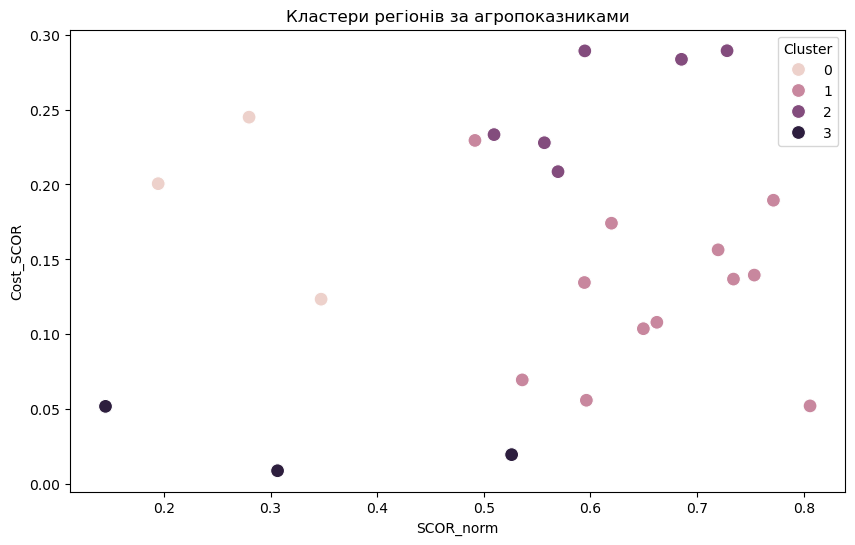

In [16]:

features = ['SCOR_norm', 'Fert_SCOR', 'Cost_SCOR']
region_data = df.groupby("Region")[features].mean()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(region_data)

kmeans = KMeans(n_clusters=4, random_state=0)
region_data['Cluster'] = kmeans.fit_predict(scaled_data)

# Візуалізація кластерів
plt.figure(figsize=(10, 6))
sns.scatterplot(data=region_data, x='SCOR_norm', y='Cost_SCOR', hue='Cluster', s=100)
plt.title('Кластери регіонів за агропоказниками')
plt.show()


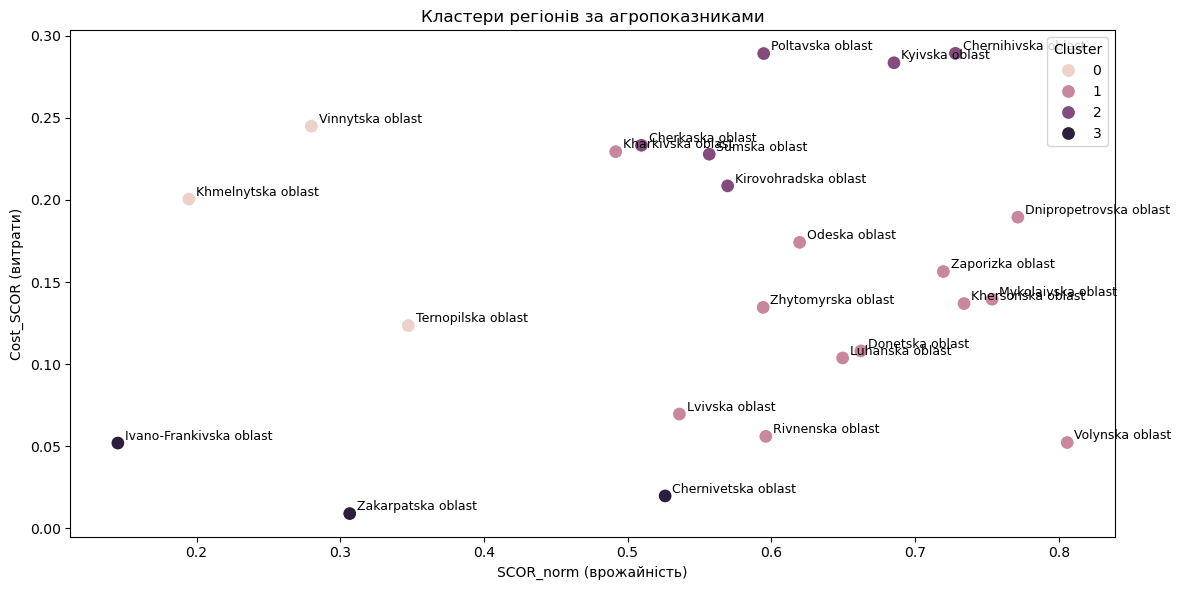

In [17]:
region_data = region_data.reset_index()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=region_data, x='SCOR_norm', y='Cost_SCOR', hue='Cluster', s=100)

# Додай підписи регіонів на точках
for i in range(region_data.shape[0]):
    plt.text(region_data['SCOR_norm'][i]+0.005,
             region_data['Cost_SCOR'][i]+0.002,
             region_data['Region'][i], fontsize=9)

plt.title('Кластери регіонів за агропоказниками')
plt.xlabel('SCOR_norm (врожайність)')
plt.ylabel('Cost_SCOR (витрати)')
plt.tight_layout()
plt.show()


C:\Users\5302\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\5302\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


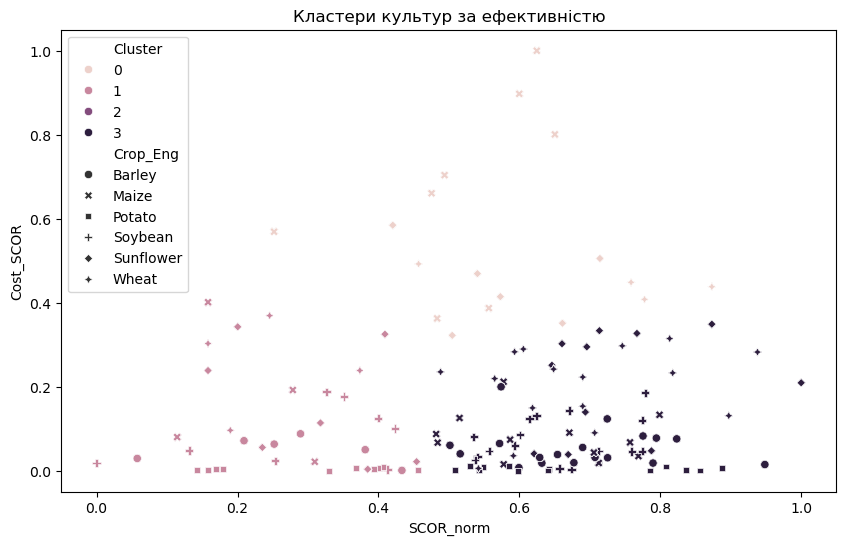

In [18]:
features = ['SCOR_norm', 'Fert_SCOR', 'Cost_SCOR']
data = df[features]  # df має записи по Region + Crop_Eng

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

kmeans = KMeans(n_clusters=4, random_state=0)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Візуалізація
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='SCOR_norm', y='Cost_SCOR', hue='Cluster', style='Crop_Eng')
plt.title('Кластери культур за ефективністю')
plt.show()


C:\Users\5302\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\5302\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


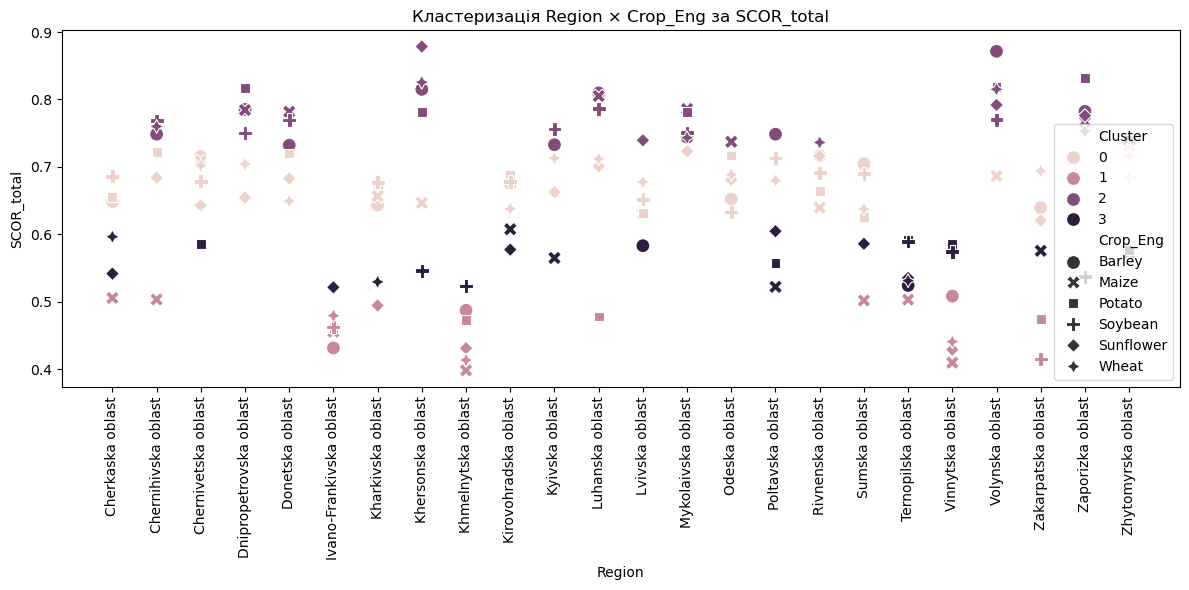

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Групуємо середнє SCOR_total для кожної пари
grouped = df.groupby(['Region', 'Crop_Eng'])['SCOR_total'].mean().reset_index()

# 2. Масштабуємо
scaler = StandardScaler()
grouped['SCOR_scaled'] = scaler.fit_transform(grouped[['SCOR_total']])

# 3. Кластеризація
kmeans = KMeans(n_clusters=4, random_state=0)
grouped['Cluster'] = kmeans.fit_predict(grouped[['SCOR_scaled']])

# 4. Візуалізація
plt.figure(figsize=(12, 6))
sns.scatterplot(data=grouped, x='Region', y='SCOR_total', hue='Cluster', style='Crop_Eng', s=100)
plt.xticks(rotation=90)
plt.title("Кластеризація Region × Crop_Eng за SCOR_total")
plt.tight_layout()
plt.show()


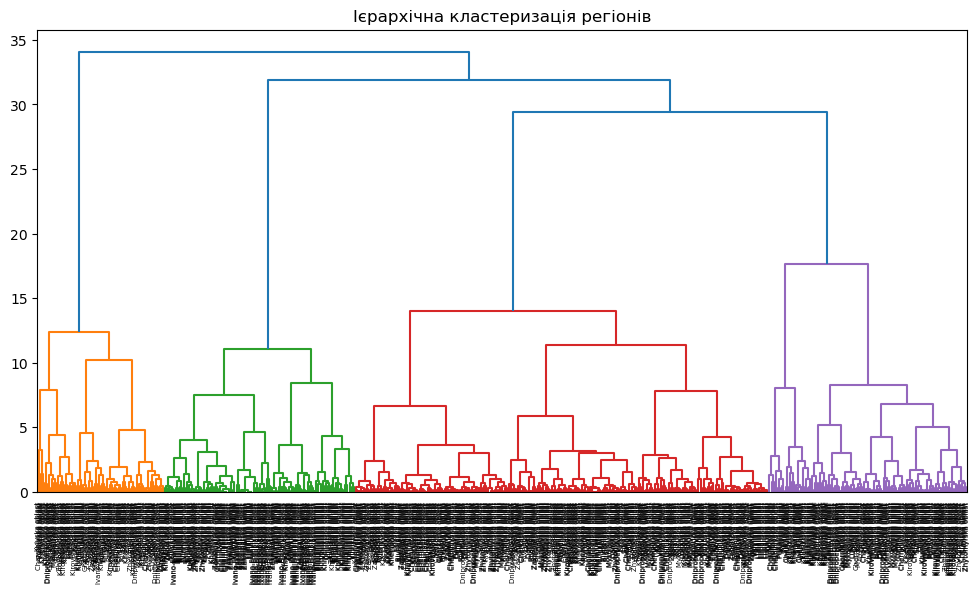

In [20]:
from scipy.cluster.hierarchy import linkage, dendrogram

scaled = scaler.fit_transform(df[features])
linked = linkage(scaled, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked, labels=df['Region'].values, leaf_rotation=90)
plt.title('Ієрархічна кластеризація регіонів')
plt.show()


In [21]:
df.columns



Index(['Region', 'Crop_Eng', 'Yield', 'Average_soil_moisture', 'Drought',
       'Yield_norm', 'Moisture_norm', 'Drought_norm', 'SCOR', 'SCOR_norm',
       'Fert_SCOR', 'Cost_SCOR', 'SCOR_total', 'Cluster'],
      dtype='object')